# Cognitive Load and Wearable Integration Analysis


## Dataset traversal discovery


## Dataset wearables physiological signals exploration & Dimensionality Reduction

The aggregation process of Samsung and Empatica sourced records into the cogwear-agg.csv (output) file involves several key steps to ensure the proper structuring and representation of the data.

Firstly, each row extracted from the source CSV files undergoes a mapping process to transform its contents into a new row within the output file. During this mapping process, existing values are appropriately assigned to their corresponding columns in the output file. However, if any values are missing in the source records, the respective fields in the output file are left empty to maintain the integrity of the data structure.

The columns in the output file are defined as follows:

1. participant_id: Each participant's folder index is translated into a participant ID to uniquely identify the source of the data.
2. empatica_bvp: Represents the readings extracted from the Empatica device's Blood Volume Pulse (BVP) sensor.
3. empatica_bvp_time: Corresponds to the time records associated with the Empatica BVP readings.
4. empatica_eda: Denotes the readings obtained from the Empatica device's Electrodermal Activity (EDA) sensor.
5. empatica_eda_time: Reflects the time records corresponding to the Empatica EDA readings.
6. empatica_temp: Signifies the temperature readings captured by the Empatica device.
7. empatica_temp_time: Indicates the time records linked to the Empatica temperature readings.
8. samsung_bvp: Represents the readings collected from the Samsung device's Blood Volume Pulse (BVP) sensor.
9. samsung_bvp_time: Corresponds to the time records associated with the Samsung BVP readings.
10. CL: Stands for Cognitive Load and serves as a categorical indicator denoting the cognitive workload experienced during the data recording process. A value of 1 (high) indicates records sourced from the "cognitive_load" subdirectory, whereas a value of 0 (low) signifies records sourced from the "baseline" subdirectory.


In [ ]:
"""
This section pertains to the initial cogwear directory, which has been omitted due to considerations related to memory management and GitHub constraints.
"""

import os
import pandas as pd


def process_directory(root_dir, output_file):
    # Create an empty list to store aggregated data
    agg_data = []

    # Iterate through the participant directories
    # Guidance for obtaining a directory's content as a list of file and subdirectories names provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    for participant_dir in os.listdir(root_dir):
        participant_id = participant_dir

        # Iterate through the subdirectories (baseline and cognitive_load)
        for sub_dir in ["baseline", "cognitive_load"]:
            sub_dir_path = os.path.join(root_dir, participant_dir, sub_dir)

            # Check if the path is a directory
            if os.path.isdir(sub_dir_path):
                # Get the cognitive load label
                cl = 0 if sub_dir == "baseline" else 1

                # Iterate through the files in the subdirectory
                # Guidance for using the `listdir()` for listing the content of a directory, provided by ChatGPT
                # Specific implementation details were adapted for the purposes of this project.
                for file in os.listdir(sub_dir_path):
                    # Guidance for using the `file.startswith()` provided by ChatGPT
                    # Specific implementation details were adapted for the purposes of this project.
                    if file.endswith(".csv") and file.startswith(
                        ("empatica_bvp", "empatica_eda", "empatica_temp", "samsung_bvp")
                    ):
                        file_path = os.path.join(sub_dir_path, file)
                        df = pd.read_csv(file_path)
                        # Extract relevant data and append to the aggregated list
                        # Guidance for using the function `iterrows()` for iterating over the index-value pairs (the index is not needed/used in this case) of a data frame provided by ChatGPT
                        # Specific implementation details were adapted for the purposes of this project.
                        for _, row in df.iterrows():
                            agg_data.append(
                                {
                                    "participant_id": participant_id,
                                    # Guidance for using the function `get()` for returning `None` when the value doesn't exist in the data frame provided by ChatGPT
                                    # Specific implementation details were adapted for the purposes of this project.
                                    # "empatica_bvp": row.get("bvp"),
                                    "empatica_bvp": row.get("bvp"),
                                    "empatica_bvp_time": (
                                        row.get("time")
                                        if "empatica_bvp" in file
                                        else None
                                    ),
                                    "empatica_eda": row.get("eda"),
                                    "empatica_eda_time": (
                                        row.get("time")
                                        if "empatica_eda" in file
                                        else None
                                    ),
                                    "empatica_temp": row.get("temp"),
                                    "empatica_temp_time": (
                                        row.get("time")
                                        if "empatica_temp" in file
                                        else None
                                    ),
                                    "samsung_bvp": row.get("PPG GREEN"),
                                    "samsung_bvp_time": (
                                        row.get("time")
                                        if "samsung_bvp" in file
                                        else None
                                    ),
                                    "CL": cl,
                                }
                            )

    # Create a df from the aggregated data
    agg_df = pd.DataFrame(agg_data)

    # Write aggregated df to .csv file
    agg_df.to_csv(output_file, index=False)


if __name__ == "__main__":
    root_directory = "./data/cogwear/pilot"
    output_file = "./data/csv-aggregation/cogwear-agg.csv"
    process_directory(root_directory, output_file)

In [30]:
import pandas as pd

# # Read the dataset
df = pd.read_csv("./data/0-csv-aggregation/cogwear-agg.csv")

# Separate the dataset based on CL categories
_0_cl_df = df[df["CL"] == 0]
_1_cl_df = df[df["CL"] == 1]

# Further split the dataset for each participant
low_cl_participant_dictionary = {}
high_cl_participant_dictionary = {}

# Where CL 0, split the df against ids
for participant_id, participant_value_df in _0_cl_df.groupby("participant_id"):
    # For each participant_id create a new entry in the dictionary
    low_cl_participant_dictionary[participant_id] = participant_value_df

# Where CL 1, split the df against ids
for participant_id, participant_value_df in _1_cl_df.groupby("participant_id"):
    # For each participant_id create a new entry in the dictionary
    high_cl_participant_dictionary[participant_id] = participant_value_df

# Save the low and high cognitive load datasets for each participant into separate directories / .csv files
# Guidance for using the function `items()` for iterating over the index-value pairs of a dictionary provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
for participant_id, df in low_cl_participant_dictionary.items():
    df.to_csv(
        f"./data/1-participant-division/{participant_id}/{participant_id}_LOW_CL.csv",
        index=False,
    )
for participant_id, df in high_cl_participant_dictionary.items():
    df.to_csv(
        f"./data/1-participant-division/{participant_id}/{participant_id}_HIGH_CL.csv",
        index=False,
    )

## Transform original records into new, time-sequenced records and transform the subset into a sample applying the mean values.

### Data Preparation:

- Read the original dataset containing sensor readings and cognitive load labels.
- Convert time columns to datetime objects for proper time handling.
- Sort the dataset by time columns to ensure sequential ordering.

### Define & Create Time Windows:

#### Define the size of the time windows

#### Process Each Time Window

- Combine time columns from all sensors to create a unified time column.
- Group the data time-intervals-wise, using the combined time column.
- Iterate over each interval.
- Calculate the mean values for sensor readings (bvp, eda, temp) within the interval.
- Calculate the upper limit of the time window to represent the end time of the interval.

### Generate New Records: Data Reduction

- For each interval, create a new record containing:
  - Participant ID: Identifies the participant associated with the record.
  - Mean sensor values: Calculated mean values for each sensor reading within the interval.
  - Time: Represents the upper limit of the time window, indicating the end time of the interval.
  - Cognitive Load (CL): Indicates the cognitive load level associated with the interval (0 for low, 1 for high).

### Aggregate New Records:

- Store the new records in a DataFrame or CSV file for further analysis or modeling.

### Repeat for Each Participant and Cognitive Load Level:

- Iterate through each participant's data and perform the above steps separately for low and high cognitive load sessions.

### Save Results:

- Save the processed data into separate files or databases for future use or analysis.


Unique counts{'empatica_bvp': 6235, 'empatica_bvp_time': 7778, 'empatica_eda': 86, 'empatica_eda_time': 487, 'empatica_temp': 18, 'empatica_temp_time': 487, 'samsung_bvp': 3003, 'samsung_bvp_time': 3053}
Minimum unique counts: 18
Participant ID: 9, CL: 0, Time Window Size: 0.0806
Unique counts{'empatica_bvp': 9108, 'empatica_bvp_time': 18343, 'empatica_eda': 155, 'empatica_eda_time': 1147, 'empatica_temp': 72, 'empatica_temp_time': 1147, 'samsung_bvp': 7070, 'samsung_bvp_time': 7200}
Minimum unique counts: 72
Participant ID: 9, CL: 1, Time Window Size: 0.0201
Unique counts{'empatica_bvp': 7183, 'empatica_bvp_time': 12944, 'empatica_eda': 37, 'empatica_eda_time': 807, 'empatica_temp': 23, 'empatica_temp_time': 805, 'samsung_bvp': 5042, 'samsung_bvp_time': 5144}
Minimum unique counts: 23
Participant ID: 0, CL: 0, Time Window Size: 0.0630
Unique counts{'empatica_bvp': 11318, 'empatica_bvp_time': 19136, 'empatica_eda': 213, 'empatica_eda_time': 1194, 'empatica_temp': 40, 'empatica_temp_tim

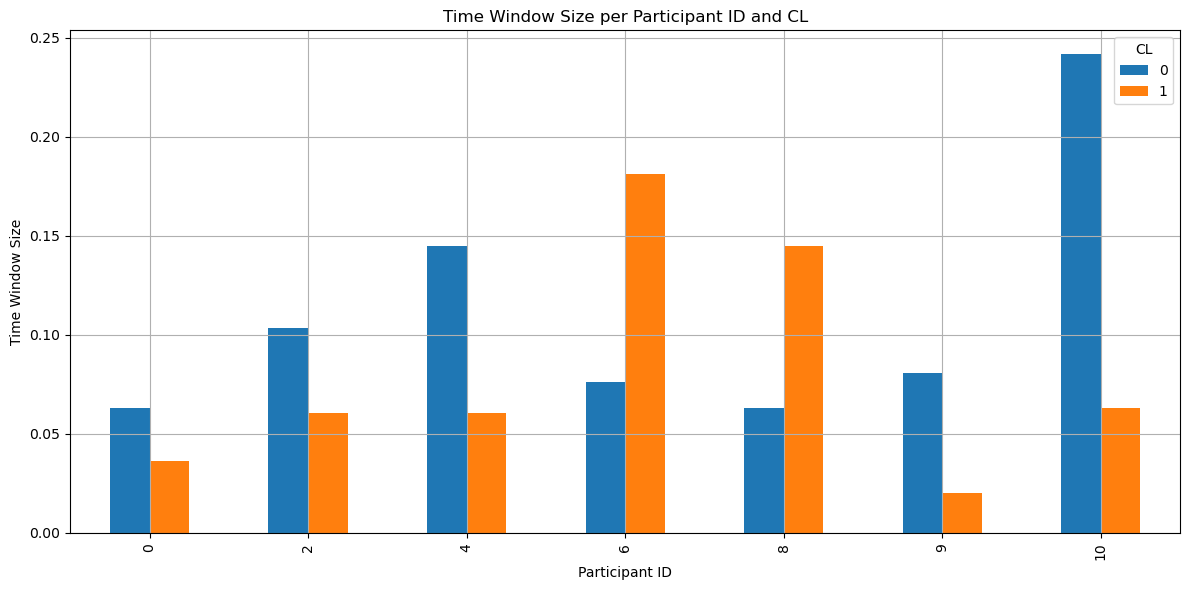

In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
participant_directory = "./data/1-participant-division/"

# Container to store the time window sizes per participant and CL
time_window_sizes = []


# Compute the most optimal (minimal) time window size, so it contains at least one of the minority attribute per window
# The data frame input contains a dataset that has been selected ID & CL wise -
# all records belong to the same ID and the same CL session
def get_min_time_window_size(df):
    # Calculate the number of unique time stamps per attribute
    # (empatica_bvp, empatica_eda, empatica_temp, samsung_bvp) frequency
    unique_counts = {
        column: df[column].nunique()
        for column in df.columns
        if "empatica" in column or "samsung" in column
    }

    # Display the minimum attributes counts
    print(f"Unique counts{unique_counts}")

    # Select the minimum number of unique time stamp count among all attributes
    min_unique_count = min(unique_counts.values())

    # Display the minimum count
    print(f"Minimum unique counts: {min_unique_count}")

    # Check if there are no valid time stamps available for the attributes in the dataset
    if min_unique_count == 0:
        # Do not return values for this ID - CL category
        return None

    # Each attribute should be represented at least once within a time window selection.
    # Compute the fraction of at each at least one sample can be selected from the minority class
    min_window_size = 1.45 / min_unique_count
    # Experiment:
    #   (1 / min) => 373 samples per (ID, CL)
    #   (1.25 / min) => 486 samples per (ID, CL)
    #   (1.4 / min) => 486 samples per (ID, CL)
    #   (1.5 / min) => 486 samples per (ID, CL)
    #   (1.6 / min) => 467 samples per (ID, CL)
    #   (1.75 / min) => 427 samples per (ID, CL)
    #   (2 / min) => 373 samples per (ID, CL)
    #   => 1.45 -> `486 samples/(ID,CL)` - The most optimal interval for selecting a subset of samples, in order to result the largest final complete dataset

    return min_window_size


# Function to create aggregated records time window wise
def process_data(df, cl):
    # Sort the df by time columns
    # Guidance for using the function `sort_values()` for sorting a data frame by the values in a set of columns
    # and altering the data frame correspondingly, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    df.sort_values(
        by=[
            "empatica_bvp_time",
            "empatica_eda_time",
            "empatica_temp_time",
            "samsung_bvp_time",
        ],
        inplace=True,
    )

    # Compute the most optimal time window size for each participant (ID) session (CL 0 or 1)
    time_window_size = get_min_time_window_size(
        df
    )  # df contains a all sessions per CL, ID-wise

    # Check if time_window_size is None
    if time_window_size is None:
        # Skip processing for this participant
        return None

    time_window_sizes.append((df["participant_id"].iloc[0], cl, time_window_size))

    # For each participant session, print the most optimal time window size for sampling
    print(
        f"Participant ID: {df['participant_id'].iloc[0]}, CL: {cl}, Time Window Size: {time_window_size:.4f}"
    )

    # Create a combined time column with the maximum of all time columns
    # Guidance for evaluating the maxim time value, row wise, among the time related attributes, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    df["time"] = df[
        [
            "empatica_bvp_time",
            "empatica_eda_time",
            "empatica_temp_time",
            "samsung_bvp_time",
        ]
    ].max(axis=1)

    # Determine the minimum and maximum time values
    min_time = df["time"].min()
    max_time = df["time"].max()

    # Calculate the total number of time intervals
    num_intervals = int((max_time - min_time) / time_window_size)

    # List the starting time for each of the time defined intervals
    time_intervals = [min_time + i * time_window_size for i in range(num_intervals + 1)]

    # Container for the time_window-mean aggregated records
    mean_seq_df = pd.DataFrame(
        columns=[
            "ID",
            "empatica_bvp",
            "empatica_eda",
            "empatica_temp",
            "samsung_bvp",
            "time",
            "CL",
        ]
    )

    # Iterate over each time_window records, compute the mean per column, and append it to the mean_seq_df
    for i in range(num_intervals):
        start_time = time_intervals[i]
        end_time = time_intervals[i + 1]

        # Select rows within the current time interval
        interval_rows = df[(df["time"] >= start_time) & (df["time"] < end_time)]

        # Compute the mean values for each column over the interval_rows selection
        mean_values = interval_rows.mean()

        # Append the mean values to the new df
        mean_seq_df = pd.concat(
            [
                mean_seq_df,
                pd.DataFrame(
                    {
                        "ID": [mean_values["participant_id"]],
                        "empatica_bvp": [mean_values["empatica_bvp"]],
                        "empatica_eda": [mean_values["empatica_eda"]],
                        "empatica_temp": [mean_values["empatica_temp"]],
                        "samsung_bvp": [mean_values["samsung_bvp"]],
                        "time": [end_time],
                        "CL": [cl],
                    }
                ),
            ],
            ignore_index=True,
        )

    return mean_seq_df


# Iterate through each participant folder
# Guidance for using the `listdir()` for listing the content of a directory, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
for id in os.listdir(participant_directory):
    participant_folder = os.path.join(participant_directory, id)

    # Iterate through low and high cognitive load files
    for cl in ["LOW_CL", "HIGH_CL"]:
        input_file_name = f"{id}_{cl}.csv"
        output_file_name = f"{id}_{cl}_SEQ.csv"

        # Read the CSV file to be processed into a df
        df = pd.read_csv(os.path.join(participant_folder, input_file_name))

        # Process the data and create aggregated records labeling the record based
        mean_seq_df = process_data(df, 1 if cl == "HIGH_CL" else 0)
        # Check if mean_seq_df is None
        if mean_seq_df is not None:
            # Write the aggregated records to a new .csv file
            mean_seq_df.to_csv(
                os.path.join(participant_folder, output_file_name), index=False
            )

time_window_sizes_df = pd.DataFrame(time_window_sizes)
time_window_sizes_df = time_window_sizes_df.rename(
    columns={0: "ID", 1: "CL", 2: "Size"}
)

# Group the df by "ID" and "CL" and calculate the mean size
time_window_sizes_df = (
    time_window_sizes_df.groupby(["ID", "CL"])["Size"].mean().unstack()
)

# Sort the df by ID
time_window_sizes_df = time_window_sizes_df.sort_values(by="ID")

# Display the time windows sizes ID and CL wise
print(time_window_sizes_df)

# Plotting parallel bars for CL 0 and CL 1
time_window_sizes_df.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Participant ID")
plt.ylabel("Time Window Size")
plt.title("Time Window Size per Participant ID and CL")
plt.legend(title="CL")
plt.grid(True)
plt.tight_layout()
plt.show()

## Sequenced Datasets Aggregation

Organizing the aggregated data into separate files based on the cognitive load level (0 - LOW / 1 - HIGH)

- Write the aggregated records for each participant and cognitive load level to new CSV files.


In [92]:
import os
import pandas as pd

# Define file paths
participant_directory = "./data/1-participant-division/"
low_cl_agg_df_file_path = "./data/2-high-low-separation/LOW_CL_AGG.csv"
high_cl_agg_df_file_path = "./data/2-high-low-separation/HIGH_CL_AGG.csv"

# Define file names termination
low_cl_file_termination = "_LOW_CL_SEQ.csv"
high_cl_file_termination = "_HIGH_CL_SEQ.csv"

# Initialize dfs to store aggregated data for low and high cognitive load
low_cl_agg_df = pd.DataFrame()
high_cl_agg_df = pd.DataFrame()

# Iterate through each participant folder
# Guidance for using the `listdir()` for listing the content of a directory, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
for id in os.listdir(participant_directory):
    participant_folder = os.path.join(participant_directory, id)

    # Define the ID_LOW_CL_SEQ.csv file name
    low_cl_seq_file_name = f"{id}{low_cl_file_termination}"
    low_cl_seq_path = os.path.join(participant_folder, low_cl_seq_file_name)
    # Guidance for using the `exists()` for checking the existence of a directory
    # before performing any operation related to it, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    if os.path.exists(low_cl_seq_path):
        # Load the LOW_CL_SEQ.csv file into a df
        low_cl_seq_df = pd.read_csv(low_cl_seq_path)
        # Append to the low cognitive load aggregated df
        low_cl_agg_df = pd.concat([low_cl_agg_df, low_cl_seq_df], ignore_index=True)

    # Define the ID_HIGH_CL_SEQ.csv file name
    high_cl_seq_file_name = f"{id}{high_cl_file_termination}"
    high_cl_seq_path = os.path.join(participant_folder, high_cl_seq_file_name)
    # Guidance for using the `exists()` for checking the existence of a directory
    # before performing any operation related to it, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    if os.path.exists(high_cl_seq_path):
        # Load the HIGH_CL_SEQ.csv file into a df
        high_cl_seq_df = pd.read_csv(high_cl_seq_path)
        # Append to the high cognitive load aggregated df
        high_cl_agg_df = pd.concat([high_cl_agg_df, high_cl_seq_df], ignore_index=True)


# Write the aggregated cl-classes-wise dfs to new .csv files
low_cl_agg_df.to_csv(low_cl_agg_df_file_path, index=False)
high_cl_agg_df.to_csv(high_cl_agg_df_file_path, index=False)

## Final Dataset Aggregation (!)

Create the final aggregated CSV dataset containing the processed data.


In [93]:
import pandas as pd

# Files path definition
high_cl_path = "./data/2-high-low-separation/HIGH_CL_AGG.csv"
low_cl_path = "./data/2-high-low-separation/LOW_CL_AGG.csv"
final_dataset_path = "./data/3-pre-processed-dataset/cogwear_processed_dataset.csv"


def merge_high_low_cl_files(file1_path, file2_path, output_path):
    # Load the high and low CL .csv files into dfs
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

    # Merge the two dfs into a new df
    merged_df = pd.concat([df1, df2], ignore_index=True)

    # Define the number of digits the float values should keep
    num_digits = 6

    # Define IDs upper-limit
    id_upper_limit = 11

    # Define CL classes
    cl_classes = [0, 1]

    # Apply formatting to all float columns in the DataFrame except 'CL' and 'ID'
    # Guidance for using the `select_dtypes()` for selecting the float data type columns, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    for column in merged_df.select_dtypes(include=["float"]).columns:
        if column not in ["CL", "ID"]:
            merged_df[column] = merged_df[column].apply(lambda x: f"{x:.{num_digits}f}")

    # Write the merged df to a new .csv file
    merged_df.to_csv(output_path, index=False)
    print(f"Merged low and high CL csv files have been saved at \n{output_path}")
    for cl in cl_classes:
        for id in range(id_upper_limit):
            selected_samples = merged_df[
                (merged_df["ID"] == id) & (merged_df["CL"] == cl)
            ]
            print(f"Number of samples for ID {id} and CL {cl}: {len(selected_samples)}")


merge_high_low_cl_files(high_cl_path, low_cl_path, final_dataset_path)

Merged low and high CL csv files have been saved at 
./data/3-pre-processed-dataset/cogwear_processed_dataset.csv
Number of samples for ID 0 and CL 0: 3347
Number of samples for ID 1 and CL 0: 1165
Number of samples for ID 2 and CL 0: 1751
Number of samples for ID 3 and CL 0: 927
Number of samples for ID 4 and CL 0: 1259
Number of samples for ID 5 and CL 0: 1204
Number of samples for ID 6 and CL 0: 2375
Number of samples for ID 7 and CL 0: 1987
Number of samples for ID 8 and CL 0: 2915
Number of samples for ID 9 and CL 0: 1508
Number of samples for ID 10 and CL 0: 515
Number of samples for ID 0 and CL 1: 9270
Number of samples for ID 1 and CL 1: 2289
Number of samples for ID 2 and CL 1: 4587
Number of samples for ID 3 and CL 1: 1290
Number of samples for ID 4 and CL 1: 4365
Number of samples for ID 5 and CL 1: 2780
Number of samples for ID 6 and CL 1: 1692
Number of samples for ID 7 and CL 1: 12973
Number of samples for ID 8 and CL 1: 1846
Number of samples for ID 9 and CL 1: 14230
Num

## Dataset Filtering

The primary objective of this project is to compare the predictive capabilities of two physiological monitoring devices, Empatica and Samsung, in assessing cognitive load based on the physiological signals they capture.

### Argumentation for Discarding Rows with Missing Values:

- Ensuring the **consistency and reliability** of data is paramount in comparative analyses.
- To accurately evaluate the performance of the Empatica and Samsung devices in predicting cognitive load, it is relevant to compare their responses over identical time intervals, where both processed the same physiological signals inputs (**temporal alignment**).

  - Rows containing missing values indicate instances where one of the devices failed to capture physiological signals during a specific 5-second interval (**data completeness**).
  - By excluding rows with missing values, we mitigate potential biases that may arise from incomplete data, aiming for a balanced and unbiased comparison between the Empatica and Samsung devices (aiming for **unbiased dataset**).
  - The removal of incomplete records enhances the **statistical validity** of the analysis by focusing only on complete and comparable data points.

- **Data Quality** assurance:

  - Only complete and reliable data points are retained for subsequent analysis.

- **Comparative Analysis**:
  - Following data preprocessing, the comparative analysis between the Empatica and Samsung devices can be conducted with confidence, as both devices are evaluated based on a consistent and complete dataset.


In [94]:
import pandas as pd

# File paths
dataset_path = "./data/3-pre-processed-dataset/cogwear_processed_dataset.csv"
filtered_dataset_path = "./data/3-pre-processed-dataset/cgw_filtered_dataset.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Discard all the incomplete records
df = df.dropna()

# Write the processed dataset to a new .csv file
df.to_csv(filtered_dataset_path, index=False)

print(f"The filtered dataset saved at \n{filtered_dataset_path}")

# Define IDs upper-limit
id_upper_limit = 11

# Define CL classes
cl_classes = [0, 1]

# Check the number of samples for each ID and CL value after filtering
for cl in cl_classes:
    for id in range(id_upper_limit):
        selected_samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        print(f"Number of samples for ID {id} and CL {cl}: {len(selected_samples)}")

The filtered dataset saved at 
./data/3-pre-processed-dataset/cgw_filtered_dataset.csv
Number of samples for ID 0 and CL 0: 785
Number of samples for ID 1 and CL 0: 0
Number of samples for ID 2 and CL 0: 725
Number of samples for ID 3 and CL 0: 0
Number of samples for ID 4 and CL 0: 730
Number of samples for ID 5 and CL 0: 0
Number of samples for ID 6 and CL 0: 725
Number of samples for ID 7 and CL 0: 0
Number of samples for ID 8 and CL 0: 700
Number of samples for ID 9 and CL 0: 486
Number of samples for ID 10 and CL 0: 498
Number of samples for ID 0 and CL 1: 1041
Number of samples for ID 1 and CL 1: 0
Number of samples for ID 2 and CL 1: 1108
Number of samples for ID 3 and CL 1: 0
Number of samples for ID 4 and CL 1: 1055
Number of samples for ID 5 and CL 1: 0
Number of samples for ID 6 and CL 1: 1227
Number of samples for ID 7 and CL 1: 0
Number of samples for ID 8 and CL 1: 1071
Number of samples for ID 9 and CL 1: 582
Number of samples for ID 10 and CL 1: 980


## Dataset Balancing

In the context of exploring various classification machine learning algorithms architectures and models, achieving a balanced dataset with an equal number of samples for high and low cognitive load states is significant.

This **balanced dataset** ensures that the machine learning models are trained on a representative dataset that equally captures the characteristics of both cognitive load states.

By reducing any existing imbalance in the dataset, the models can learn to distinguish between high and low cognitive load states more effectively (**better efficiency**).

Balancing the dataset facilitates a fair comparison of different machine learning algorithms, allowing a **better assessment of their performance**.

Models trained on a balanced dataset are less likely to exhibit bias towards the majority class and are better equipped to perform well on unseen data. Additionally, a balanced dataset enhances the **robustness** and **reliability** of the classification models, enabling them to achieve higher accuracy and predictive performance across both high and low cognitive load states.

Ensuring equal number of samples for each cognitive load state, the performance of classification machine learning algorithms is enhanced and show more meaningful insights into cognitive load prediction.


In [95]:
import random

# File paths
dataset_path = "./data/3-pre-processed-dataset/cgw_filtered_dataset.csv"
balanced_dataset_path = "./data/4-data-balancing/dataset.csv"

# Load the input dataset
df = pd.read_csv(dataset_path)

# Count the number of samples for each class
# Guidance for using the `value_counts()` for getting a Serries where the index is the unique value,
# and the value is the count of that specific value in the column, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
class_counts = df["CL"].value_counts()

# Display the cl class distribution
for class_value, count in class_counts.items():
    print(f"The class {class_value} has {count} entries\n")

# Define a variable to hold the smallest number of samples ID-CL wise
minority_sample_distribution = 100000

# Define IDs upper-limit
id_upper_limit = 11

# Define CL classes
cl_classes = [0, 1]

# Check the number of samples for each ID and CL value after filtering
for cl in cl_classes:
    for id in range(id_upper_limit):
        samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        print(f"Number of samples for ID {id} and CL {cl}: {len(samples)}")
        if minority_sample_distribution > len(samples) and len(samples) != 0:
            minority_sample_distribution = len(samples)

# Display the minority ID-CL-wise set selection's size
print(f"\nThe minority_sample_distribution value is {minority_sample_distribution}\n")

# Reduce the number of samples for each ID and CL class to match the minority_sample_distribution size
for cl in cl_classes:
    for id in range(id_upper_limit):
        samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        if len(samples) > minority_sample_distribution:
            # Get randomly indexes to match the difference
            # Guidance for randomly selecting the extra indexes from the selected sample sets, provided by ChatGPT
            # Specific implementation details were adapted for the purposes of this project.
            indexes_to_remove = random.sample(
                samples.index.tolist(), len(samples) - minority_sample_distribution
            )

            # Drop the extra samples from the df based on the records index values
            df = df.drop(indexes_to_remove)

# Convert 'ID' and 'CL' columns to integer
df["ID"] = df["ID"].astype(int)
df["CL"] = df["CL"].astype(int)

# Save the balanced df to a new .csv file
df.to_csv(balanced_dataset_path, index=False)
print(
    f"The balanced dataset was written into a new csv file at \n{balanced_dataset_path}"
)

# Check the number of samples for each ID and CL value after filtering
for cl in cl_classes:
    for id in range(id_upper_limit):
        samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        if len(samples) > 0:
            print(f"Number of samples for ID {id} and CL {cl}: {len(samples)}")

The class 1 has 7064 entries

The class 0 has 4649 entries

Number of samples for ID 0 and CL 0: 785
Number of samples for ID 1 and CL 0: 0
Number of samples for ID 2 and CL 0: 725
Number of samples for ID 3 and CL 0: 0
Number of samples for ID 4 and CL 0: 730
Number of samples for ID 5 and CL 0: 0
Number of samples for ID 6 and CL 0: 725
Number of samples for ID 7 and CL 0: 0
Number of samples for ID 8 and CL 0: 700
Number of samples for ID 9 and CL 0: 486
Number of samples for ID 10 and CL 0: 498
Number of samples for ID 0 and CL 1: 1041
Number of samples for ID 1 and CL 1: 0
Number of samples for ID 2 and CL 1: 1108
Number of samples for ID 3 and CL 1: 0
Number of samples for ID 4 and CL 1: 1055
Number of samples for ID 5 and CL 1: 0
Number of samples for ID 6 and CL 1: 1227
Number of samples for ID 7 and CL 1: 0
Number of samples for ID 8 and CL 1: 1071
Number of samples for ID 9 and CL 1: 582
Number of samples for ID 10 and CL 1: 980

The minority_sample_distribution value is 486


## Dataset Relevant Column Filtering

At this stage of pre-processing the dataset, the 'time' column is not relevant for training the Machine Learning models.
For this reason, the next step in the process of pre-processing the dataset is to discard this column from the final form of the dataset before the processing -splitting, and further processing- steps.


In [96]:
import pandas as pd

# Define file paths
dataset_path = "./data/4-data-balancing/dataset.csv"
reduced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"

# Read the dataset
df = pd.read_csv(dataset_path)

# Drop the 'time' column
df = df.drop(columns=["time"])

# Define IDs upper-limit
id_upper_limit = 11

# Define CL classes
cl_classes = [0, 1]

# Fix number of digits for float columns
num_digits = 6

# Apply formatting to all float columns in the DataFrame except 'CL' and 'ID'
# Guidance for using the `select_dtypes()` for selecting the float data type columns, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
for column in df.select_dtypes(include=["float"]).columns:
    if column not in ["CL", "ID"]:
        df[column] = df[column].apply(lambda x: f"{x:.{num_digits}f}")

# Save the reduced DataFrame to a new CSV file
df.to_csv(reduced_dataset_path, index=True)
print(
    f"The final pre-processed dataset is saved in the csv file \n{reduced_dataset_path}"
)

for cl in cl_classes:
    for id in range(id_upper_limit):
        samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        if len(samples) > 0:
            print(f"Number of samples for ID {id} and CL {cl}: {len(samples)}")

The final pre-processed dataset is saved in the csv file 
./data/4-data-balancing/reduced_dataset.csv
Number of samples for ID 0 and CL 0: 486
Number of samples for ID 2 and CL 0: 486
Number of samples for ID 4 and CL 0: 486
Number of samples for ID 6 and CL 0: 486
Number of samples for ID 8 and CL 0: 486
Number of samples for ID 9 and CL 0: 486
Number of samples for ID 10 and CL 0: 486
Number of samples for ID 0 and CL 1: 486
Number of samples for ID 2 and CL 1: 486
Number of samples for ID 4 and CL 1: 486
Number of samples for ID 6 and CL 1: 486
Number of samples for ID 8 and CL 1: 486
Number of samples for ID 9 and CL 1: 486
Number of samples for ID 10 and CL 1: 486


# Plot the balanced feature and id wise dataset, using a bar chart to visualize the CL data distribution


Number of samples for ID 0 and CL 0: 486
Number of samples for ID 1 and CL 0: 486
Number of samples for ID 2 and CL 0: 486
Number of samples for ID 3 and CL 0: 486
Number of samples for ID 4 and CL 0: 486
Number of samples for ID 5 and CL 0: 486
Number of samples for ID 6 and CL 0: 486
Number of samples for ID 7 and CL 0: 486


Number of samples for ID 8 and CL 0: 486
Number of samples for ID 9 and CL 0: 486
Number of samples for ID 10 and CL 0: 486
Number of samples for ID 0 and CL 1: 486
Number of samples for ID 1 and CL 1: 486
Number of samples for ID 2 and CL 1: 486
Number of samples for ID 3 and CL 1: 486
Number of samples for ID 4 and CL 1: 486
Number of samples for ID 5 and CL 1: 486
Number of samples for ID 6 and CL 1: 486
Number of samples for ID 7 and CL 1: 486
Number of samples for ID 8 and CL 1: 486
Number of samples for ID 9 and CL 1: 486
Number of samples for ID 10 and CL 1: 486


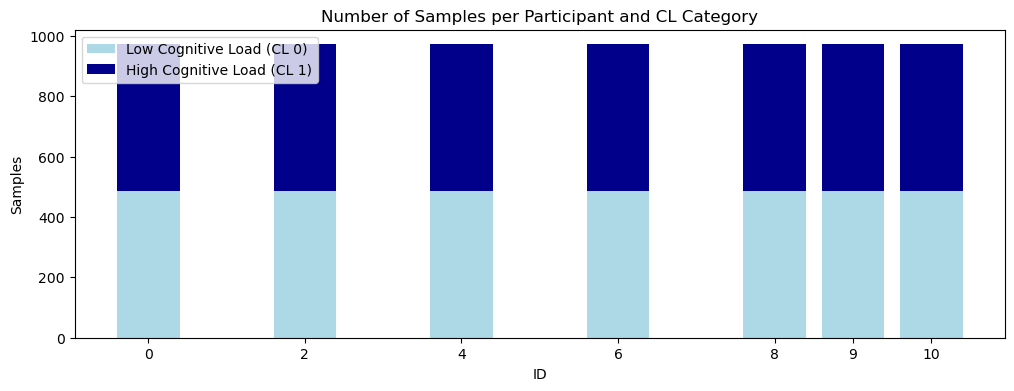

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
reduced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"

# load the dataset into a df
df = pd.read_csv(reduced_dataset_path)

# Print the number of samples for each ID-CL selection
for cl in cl_classes:
    for id in range(id_upper_limit):
        selected_samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        if len(samples) > 0:
            print(f"Number of samples for ID {id} and CL {cl}: {len(samples)}")

# Initialize lists to store the number of samples for each participant and CL category
cl_0_samples = []
cl_1_samples = []

# Define IDs upper-limit
id_upper_limit = 11

# Define CL classes
cl_classes = [0, 1]

# Iterate over each participant ID
for id in range(id_upper_limit):
    # Count the number of samples for CL 0 and CL 1 for the current participant ID
    cl_0_count = len(df[(df["ID"] == id) & (df["CL"] == 0)])
    cl_1_count = len(df[(df["ID"] == id) & (df["CL"] == 1)])

    if cl_0_count > 0 and cl_1_count > 1:
        # Append the counts to the respective lists
        cl_0_samples.append(cl_0_count)
        cl_1_samples.append(cl_1_count)

# Get unique participant IDs
unique_ids = df["ID"].unique()

# Plot the number of samples for each participant and CL category
# Guidance for plotting the dataset ID-wise in a bar chart, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
plt.figure(figsize=(12, 4))
plt.bar(unique_ids, cl_0_samples, color="lightblue", label="Low Cognitive Load (CL 0)")
plt.bar(
    unique_ids,
    cl_1_samples,
    bottom=cl_0_samples,
    color="darkblue",
    label="High Cognitive Load (CL 1)",
)
plt.xlabel("ID")
plt.ylabel("Samples")
plt.title("Number of Samples per Participant and CL Category")
plt.legend()
plt.xticks(unique_ids)
plt.show()

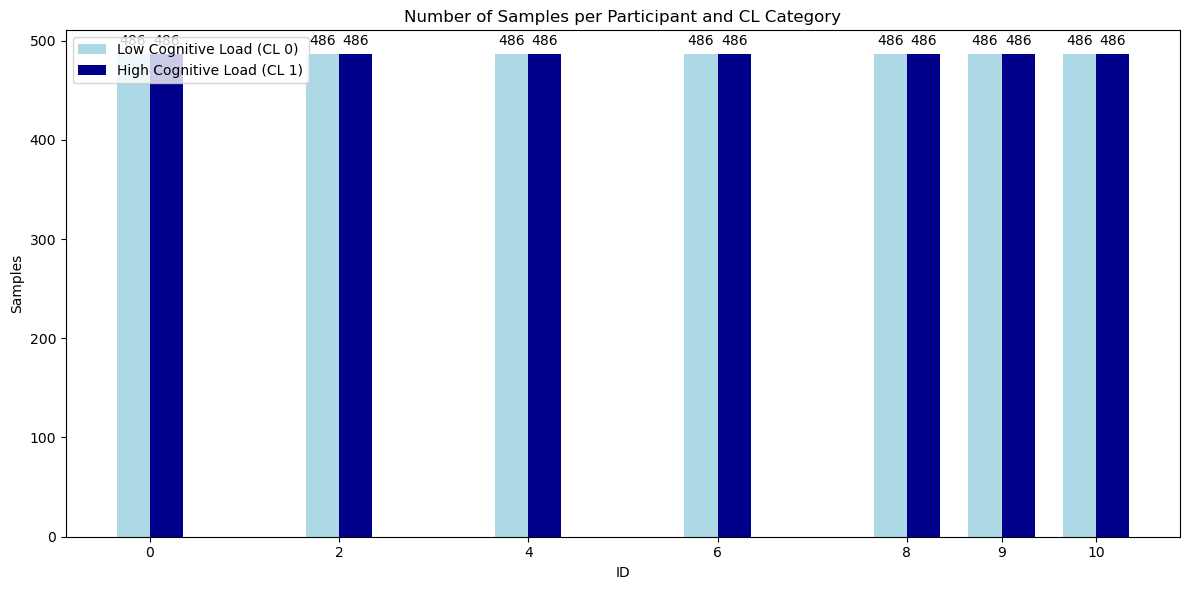

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
reduced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"

# Load the dataset into a df
df = pd.read_csv(reduced_dataset_path)

# Initialize lists to store the number of samples for each participant and CL category
cl_0_samples = []
cl_1_samples = []

# Define IDs upper-limit
id_upper_limit = 11

# Define CL classes
cl_classes = [0, 1]

# Iterate over each participant ID
for id in range(id_upper_limit):
    # Count the number of samples for CL 0 and CL 1 for the current participant ID
    cl_0_count = len(df[(df["ID"] == id) & (df["CL"] == 0)])
    cl_1_count = len(df[(df["ID"] == id) & (df["CL"] == 1)])

    if cl_0_count > 0 and cl_1_count > 1:
        # Append the counts to the respective lists
        cl_0_samples.append(cl_0_count)
        cl_1_samples.append(cl_1_count)

# Get unique participant IDs
unique_ids = df["ID"].unique()

# Create the figure and axes objects
# Guidance for plotting / visualizing the dataset in a bar chart as parallel bars cl wise , provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.35

# Define the x locations for the groups
x = unique_ids

# Plot the grouped bars
cl_0_bars = ax.bar(
    x - bar_width / 2,
    cl_0_samples,
    bar_width,
    color="lightblue",
    label="Low Cognitive Load (CL 0)",
)
cl_1_bars = ax.bar(
    x + bar_width / 2,
    cl_1_samples,
    bar_width,
    color="darkblue",
    label="High Cognitive Load (CL 1)",
)

# Add labels, title, and legend
ax.set_xlabel("ID")
ax.set_ylabel("Samples")
ax.set_title("Number of Samples per Participant and CL Category")
ax.set_xticks(x)
ax.legend()


# Add text annotations above each bar
# Guidance for adding labels with the number of samples per category on top of each bar, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            "{}".format(height),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(cl_0_bars)
autolabel(cl_1_bars)
plt.tight_layout()
plt.show()

Number of samples for ID 0 and CL 0: 486
Number of samples for ID 2 and CL 0: 486
Number of samples for ID 4 and CL 0: 486
Number of samples for ID 6 and CL 0: 486
Number of samples for ID 8 and CL 0: 486
Number of samples for ID 9 and CL 0: 486
Number of samples for ID 10 and CL 0: 486
Number of samples for ID 0 and CL 1: 486
Number of samples for ID 2 and CL 1: 486
Number of samples for ID 4 and CL 1: 486
Number of samples for ID 6 and CL 1: 486
Number of samples for ID 8 and CL 1: 486
Number of samples for ID 9 and CL 1: 486
Number of samples for ID 10 and CL 1: 486


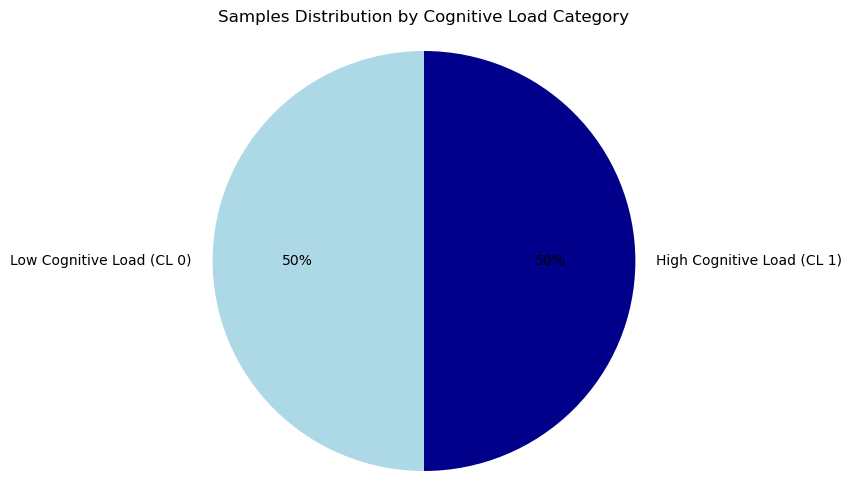

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
reduced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(reduced_dataset_path)

# Print the number of samples for each ID-CL selection
for cl in cl_classes:
    for id in range(id_upper_limit):
        selected_samples = df[(df["ID"] == id) & (df["CL"] == cl)]
        if len(selected_samples) > 0:
            print(f"Number of samples for ID {id} and CL {cl}: {len(selected_samples)}")

# Calculate the total number of samples for each CL category
total_samples_cl_0 = sum(
    len(df[(df["ID"] == id) & (df["CL"] == 0)]) for id in range(id_upper_limit)
)
total_samples_cl_1 = sum(
    len(df[(df["ID"] == id) & (df["CL"] == 1)]) for id in range(id_upper_limit)
)

# Plot the data in a pie chart
# Guidance for plotting / visualizing the dataset in a pie chart, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
labels = ["Low Cognitive Load (CL 0)", "High Cognitive Load (CL 1)"]
sizes = [total_samples_cl_0, total_samples_cl_1]
colors = ["lightblue", "darkblue"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.0f%%", startangle=90)
plt.title("Samples Distribution by Cognitive Load Category")
plt.axis("auto")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()